### K nearest neighbors

Suministramos los grupos que existen en los datos.Podriamos primero aplicar un clustering y separar la info de una forma automatizada, posteriormente Aplicar tecnica de knn

* Los vecinos son los puntos que ya conocemos de nuestros datos
* k impar para que no haya posibilidad de empates
* Tambien se le pueden dar pesos a los k vecinos

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from math import sqrt
from collections import Counter
from sklearn import preprocessing, neighbors
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import warnings


In [25]:
df_cancer = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt",header=None)

In [26]:
df_cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [28]:
df_cancer.replace("?",-999999,inplace=True)

In [29]:
df_cancer.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


En caso de tener valores missing, hacemos imputacion con un numero muy negativo para que no compute y no afecte al resto de elementos al calcular los vecinos.

In [30]:
df_cancer.columns = ["name","V1","V2","V3","V4","V5","V6","V7","V8","V9","class"]
df_cancer.drop(columns="name",inplace=True)

In [40]:
df_cancer.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [41]:
Y = df_cancer["class"]
X = df_cancer.iloc[:,:9]

### Clasificador K vecinos

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [43]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [44]:
accuracy = clf.score(X_test,Y_test)
accuracy

0.9928571428571429

#### Clasificar nuevos datos

In [45]:
sample_measure = np.array([4,2,1,1,1,2,3,2,1])
sample_measure = sample_measure.reshape(1,-1)
prediction = clf.predict(sample_measure)

/Users/linatobon/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
prediction

array([2])

In [50]:
sample_measure_2 = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]]).reshape(2,-1)
prediction = clf.predict(sample_measure_2)

/Users/linatobon/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
prediction

array([2, 2])

### Nuestro propio KNN

In [54]:
dataset = {
    "k":[[1,2],[2,3],[3,1]],
    "r": [[6,5],[7,7],[6,6]]
}
new_point = [5,7]

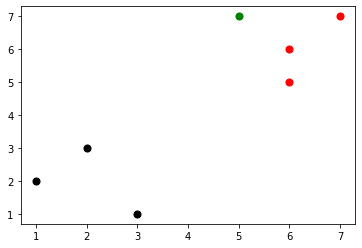

In [61]:
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1],s=50,color="green")

In [59]:
def k_nearest_neighbors(data,prediction,k=3):
    if len(data)>=k:
        warnings.warn("k es un valor menor que el numero de elementos a votar")
        distances = []
        for group in data:
            for feature in data[group]:
                d = sqrt((feature[0]-prediction[0])**2+(feature[1]-prediction[1])**2)
                distances.append([d,group])
    return vote_result


['k', 'r']